# Features Engineering

<h2>Table of Contents</h2>

- [Features Engineering](#features-engineering)
  - [1. Fast Fourier Transform Visualization](#1.-fast-fourier-transform-visualization)
    - [1.1. Focused State](#1.1.-focused-state)
    - [1.2. Unfocused State](#1.2.-unfocused-state)
    - [1.3. Drownsy state](#1.3.-drownsy-state)
  - [2. Features Extraction](#2.-features-extraction)
    - [2.1. Minh họa cửa sổ trượt](#2.1.-minh-họa-cửa-sổ-trượt)
    - [2.2. Sliding Window Method](#2.2.-sliding-window-method)
  - [3. Apply thử mô hình cơ bản](#3.-apply-thử-mô-hình-cơ-bản)
  - [Epoch method (nếu cần thì sài)](#epoch-method-(nếu-cần-thì-sài))



## 1. Fast Fourier Transform Visualization

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("data/extracted_eeg15.csv")
df.head()

,t,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4,state,epoch
0,0,40.821597,-55.720836,132.406203,-65.906920,-27.235861,7.739363,-0.103020,-42.830483,-16.779351,18.105731,-10.108818,15.131034,23.874840,-19.393478,focused,0
1,1,164.275699,-225.401365,533.689425,-265.215716,-109.811868,31.589598,-0.305979,-172.698659,-66.833721,73.032387,-41.106019,61.126783,95.936295,-78.276861,focused,0
2,2,252.201083,-350.066454,824.645749,-408.544243,-170.189040,49.851558,-0.561157,-266.739265,-99.321655,112.366766,-65.002391,94.192815,147.314882,-120.148647,focused,0
3,3,201.299424,-285.483140,670.948433,-330.759800,-140.280957,41.485909,-1.769399,-215.703902,-71.806241,89.031566,-55.911816,74.458805,117.688938,-93.197820,focused,0
4,4,151.189059,-213.813066,511.170971,-252.139256,-109.470773,30.539078,-3.822168,-161.832387,-47.651066,63.987032,-44.520633,52.789621,86.498565,-62.924980,focused,0


In [8]:
df.describe()

,t,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4,epoch
count,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000,234372.000000
mean,117185.500000,-0.000796,0.001664,-0.000426,-0.000771,-0.000737,0.001404,0.003138,0.001228,-0.000156,-0.000624,-0.000891,-0.000987,-0.002299,0.000252,915.015633
std,67657.512983,6.820961,6.506749,9.732587,7.071858,6.622523,9.622508,9.480014,10.398798,8.031284,6.130513,8.721106,6.062143,6.259187,7.355975,528.574256
min,0.000000,-250.272950,-350.066454,-266.167796,-408.544243,-249.169179,-76.796953,-74.159925,-266.739265,-99.321655,-251.027099,-1631.444418,-251.027098,-251.665952,-120.148647,0.000000
25%,58592.750000,-3.771793,-3.678801,-4.559432,-3.836912,-3.864927,-5.181541,-5.367281,-5.475723,-4.792199,-3.524329,-3.659640,-3.490930,-3.577444,-4.487228,457.000000
50%,117185.500000,0.025518,0.006329,-0.027069,0.035489,0.084119,0.024576,0.067148,0.036545,-0.020094,0.015097,0.008275,0.007605,0.009008,-0.025582,915.000000
75%,175778.250000,3.768930,3.681789,4.533321,3.862095,3.938184,5.231562,5.421540,5.518093,4.780645,3.534404,3.642907,3.492689,3.585261,4.460426,1373.000000
max,234371.000000,329.263468,257.312939,824.645749,136.332423,142.437287,244.267416,226.956244,251.371775,284.108234,136.425810,611.291082,94.192815,147.314882,261.584540,1831.000000


In [9]:
# setting
fs = 128

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot FFT for a specific epoch
def viz_fft(df, channel, state, start_idx, fs=128, epoch_length=128):
    # Get data for the specific channel and state
    data = df[(df['state'] == state)][channel].values

    # Check if there is enough data to get an epoch
    if start_idx + epoch_length > len(data):
        print(f"Not enough data for epoch starting at position {start_idx}.")
        return

    # Get data for the epoch
    epoch_data = data[start_idx:start_idx + epoch_length]

    # Check for empty data
    if len(epoch_data) == 0:
        print(f"Empty data for state '{state}' from position {start_idx}.")
        return

    # Apply FFT
    fft_data = np.fft.fft(epoch_data)
    freqs = np.fft.fftfreq(len(epoch_data), d=1/fs)

    # Get positive frequencies
    positive_freqs = freqs[freqs >= 0]
    positive_fft_data = np.abs(fft_data[freqs >= 0])

    # Plot the graph
    plt.plot(positive_freqs, positive_fft_data)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(f'FFT of {channel}, State: {state}, Position: {start_idx}')
    plt.grid(True)

# Function to plot n consecutive epochs for a specific state
def viz_nepochs_state(df, channel, num_epochs, state='focused', fs=128, epoch_length=128):
    plt.figure(figsize=(12, num_epochs * 3))
    current_idx = 0  # Start from the first sample
    epochs_plotted = 0

    # Get data for the specific state
    state_data = df[df['state'] == state]
    total_samples = len(state_data)

    while epochs_plotted < num_epochs and current_idx + epoch_length <= total_samples:
        plt.subplot(num_epochs, 1, epochs_plotted + 1)
        viz_fft(df, channel, state, current_idx, fs, epoch_length)
        epochs_plotted += 1
        current_idx += epoch_length  # Move to the next epoch

    if epochs_plotted == 0:
        print(f"No data to display for state '{state}'.")
    else:
        plt.tight_layout()
        plt.show()

### 1.1. Focused State

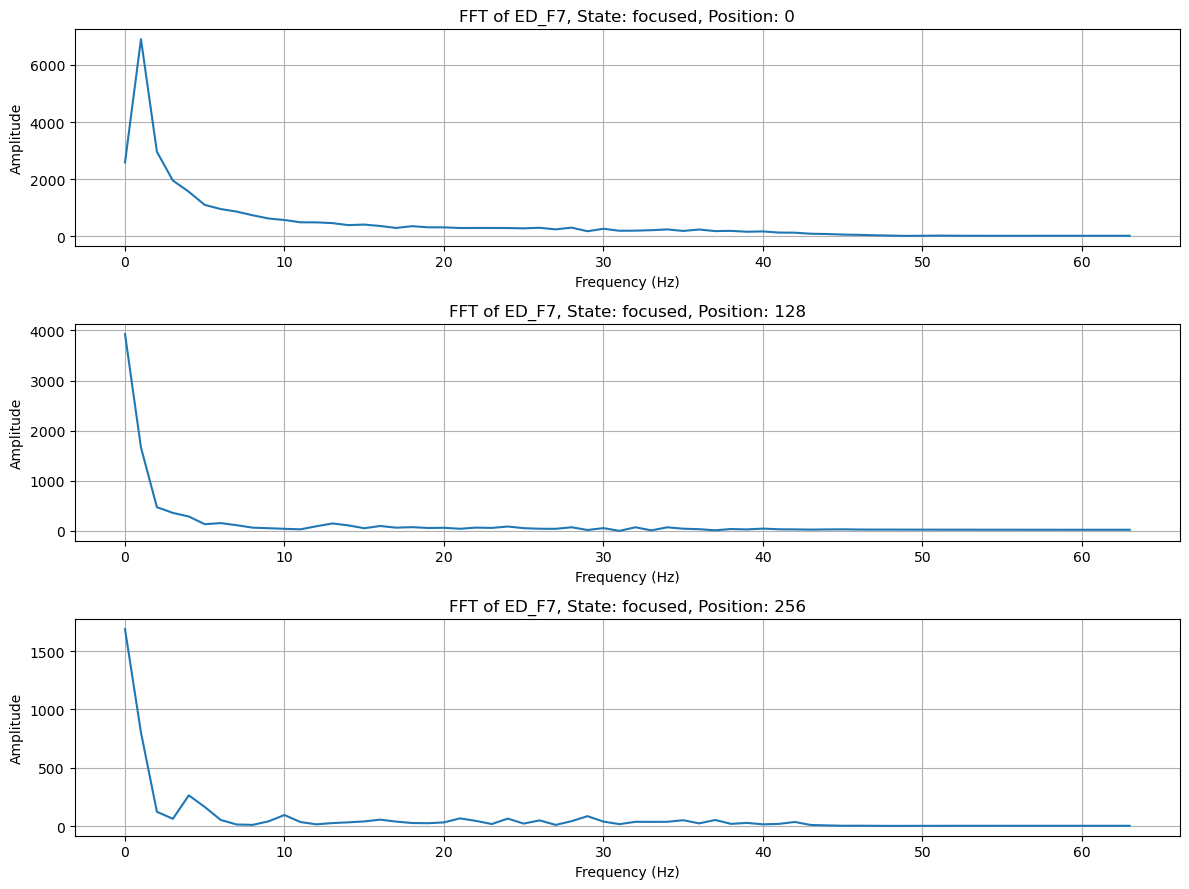

In [11]:
# Test with channel ED_F7 with 3 epochs, focused state
channel = 'ED_F7'
num_epochs = 3

viz_nepochs_state(df, channel, num_epochs, state='focused')

### 1.2. Unfocused State

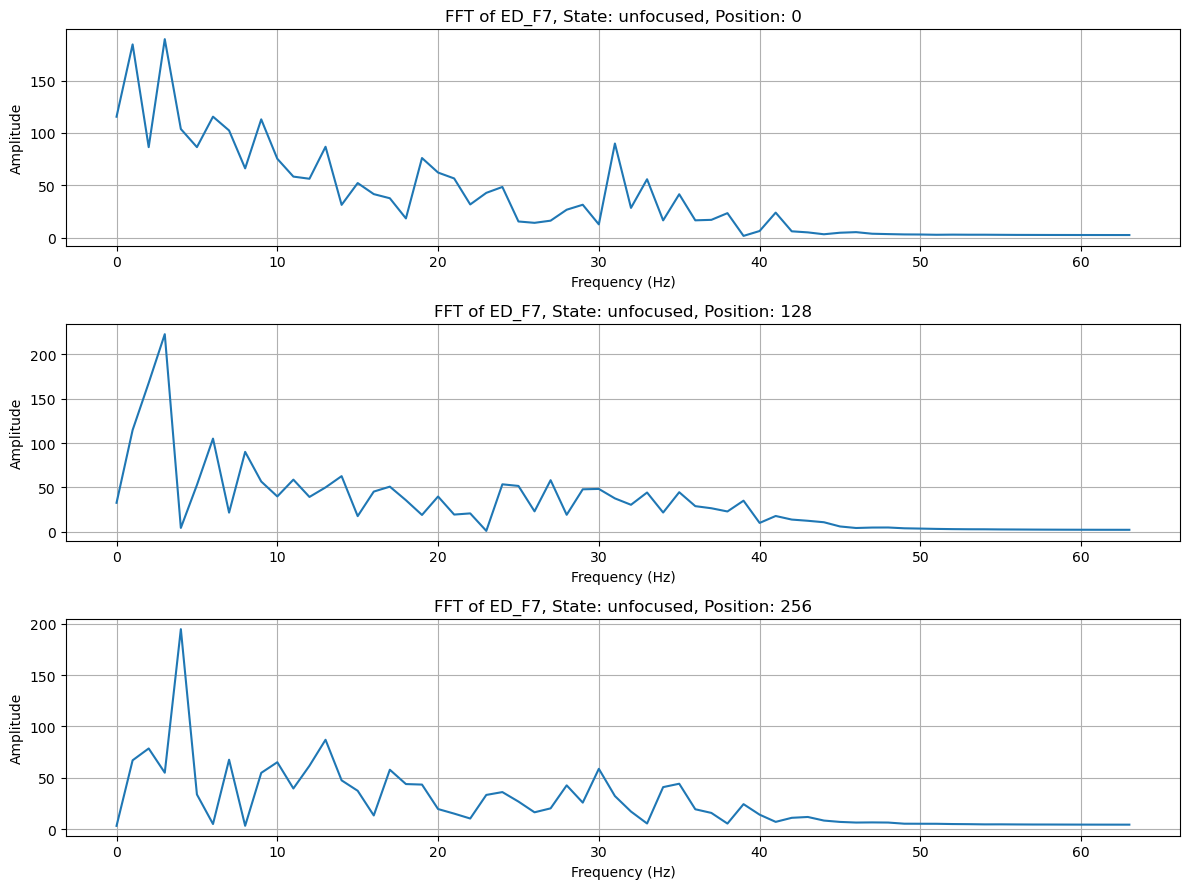

In [12]:
# Test with channel ED_F7 with 3 epochs, unfocused state
viz_nepochs_state(df, channel, num_epochs, state='unfocused')

### 1.3. Drownsy state

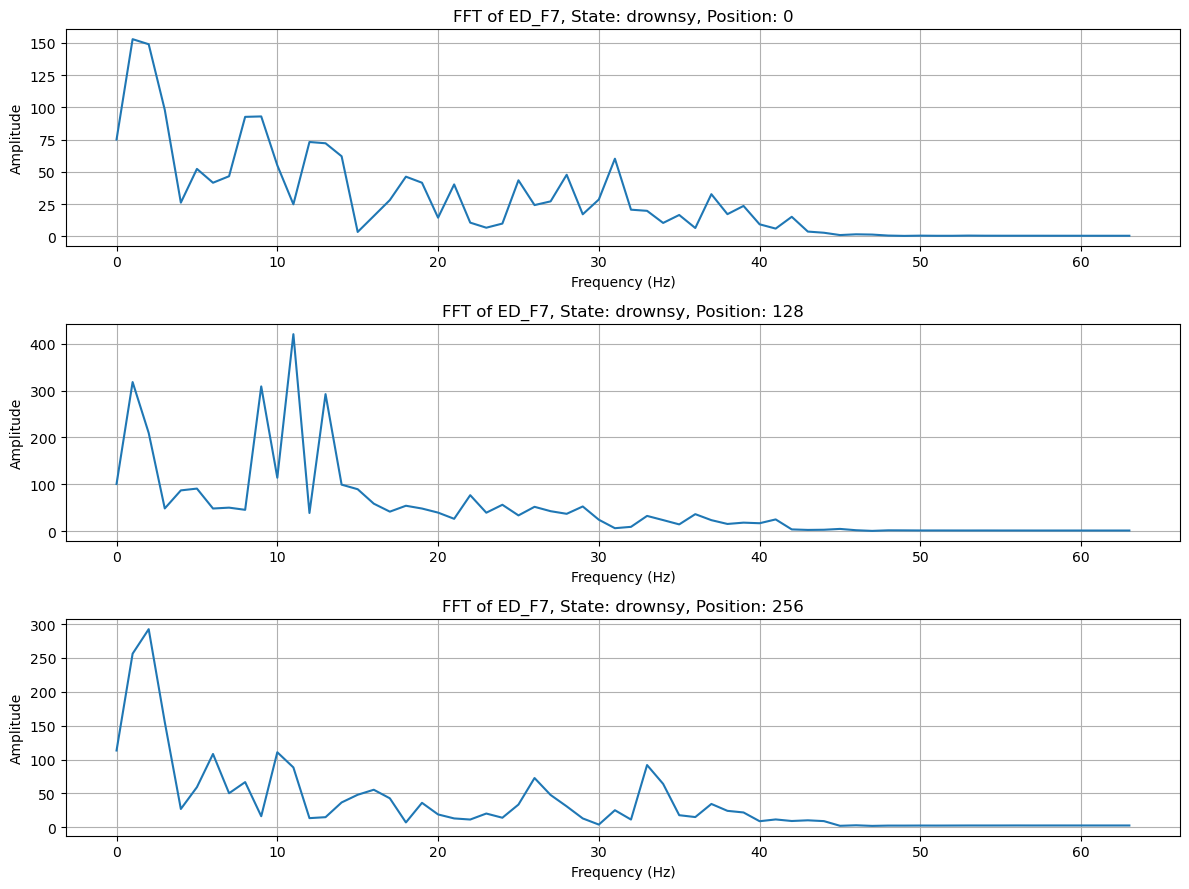

In [13]:
# Test with channel ED_F7 with 3 epochs, drownsy state

viz_nepochs_state(df, channel, num_epochs, state='drownsy')

In [14]:
# useful channel
useful_channels = ['ED_F7','ED_F3','ED_P7','ED_O1','ED_O2','ED_P8','ED_AF4']
# then useful_columns is 
useful_columns = ['t', 'ED_F7','ED_F3','ED_P7','ED_O1','ED_O2','ED_P8','ED_AF4', 'state']

df = df[useful_columns]
df.head()

,t,ED_F7,ED_F3,ED_P7,ED_O1,ED_O2,ED_P8,ED_AF4,state
0,0,-55.720836,132.406203,7.739363,-0.103020,-42.830483,-16.779351,-19.393478,focused
1,1,-225.401365,533.689425,31.589598,-0.305979,-172.698659,-66.833721,-78.276861,focused
2,2,-350.066454,824.645749,49.851558,-0.561157,-266.739265,-99.321655,-120.148647,focused
3,3,-285.483140,670.948433,41.485909,-1.769399,-215.703902,-71.806241,-93.197820,focused
4,4,-213.813066,511.170971,30.539078,-3.822168,-161.832387,-47.651066,-62.924980,focused


## 2. Features Extraction

Thử trích xuất đặc trưng để dễ hình dung:
- **Power spectral density (PSD):** Tổng công suất trong từng dải sóng (delta, theta, alpha, beta, gamma)
- **Relative power:** tỷ lệ công suất của từng dải sóng đối với tổng công suất
- **Peak Frequency:** tần số tại điểm có biên độ lớn nhất
- **Band ratios:** Tỷ lệ giữa các dải sóng (ví dụ beta/alpha)
- **Descriptive Statistics:** thống kê mô tả

Sẽ tìm hiểu các features khác và thêm vào sau

### 2.1. Minh họa cửa sổ trượt

In [15]:
import numpy as np

def rolling_average(data, window_length, step_size):
    averages = []
    positions = []
    for start in range(0, len(data) - window_length + 1, step_size):
        end = start + window_length
        window_data = data[start:end]
        avg = np.mean(window_data)
        averages.append(avg)
        positions.append((start, end))
    return averages, positions

# Tạo dữ liệu mẫu
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Sử dụng hàm rolling_average
window_length = 4
step_size = 2

averages, positions = rolling_average(data, window_length, step_size)

# In kết quả
for i, (avg, pos) in enumerate(zip(averages, positions)):
    print(f"Cửa sổ {i+1}: Vị trí {pos}, Giá trị: {data[pos[0]:pos[1]]}, Trung bình: {avg}")

Cửa sổ 1: Vị trí (0, 4), Giá trị: [1 2 3 4], Trung bình: 2.5
Cửa sổ 2: Vị trí (2, 6), Giá trị: [3 4 5 6], Trung bình: 4.5
Cửa sổ 3: Vị trí (4, 8), Giá trị: [5 6 7 8], Trung bình: 6.5
Cửa sổ 4: Vị trí (6, 10), Giá trị: [ 7  8  9 10], Trung bình: 8.5


### 2.2. Sliding Window Method

In [16]:
import numpy as np

def feature_extraction_sliding_window(df, fs, window_length, step_size):
    bands = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
        'gamma': (30, 50)  # Max is 50 Hz due to preprocessing
    }

    len_data = len(df)
    feature_matrix = []
    labels = []
    num_channels = df.shape[1] - 2  # Exclude time and state columns

    # Convert data to numpy array for performance improvement
    eeg_data = df.iloc[:, 1:num_channels+1].values  # EEG data
    states = df.iloc[:, -1].values  # State labels

    window_samples = window_length
    step_samples = step_size

    # Precompute frequencies for FFT
    freqs = np.fft.fftfreq(window_samples, d=1/fs)
    positive_freqs = freqs[freqs >= 0]

    # Precompute masks for frequency bands
    freqs_in_band = {}
    for band_name, (low, high) in bands.items():
        freqs_in_band[band_name] = (positive_freqs >= low) & (positive_freqs < high)

    for start in range(0, len_data - window_samples + 1, step_samples):
        end = start + window_samples
        window_data = eeg_data[start:end, :]
        label = states[start]  # Get label at the start of the window

        # Check if window is not of sufficient length
        if window_data.shape[0] != window_samples:
            continue

        # Apply FFT to window
        fft_data = np.fft.fft(window_data, axis=0)
        positive_fft_data = np.abs(fft_data[freqs >= 0, :])

        # Calculate total power for each frequency band
        band_powers = {}
        for band_name in bands.keys():
            band_mask = freqs_in_band[band_name]
            band_power = np.sum(positive_fft_data[band_mask, :], axis=0)
            band_powers[band_name] = band_power

        # Calculate total power across all frequency bands
        total_power = np.sum(list(band_powers.values()), axis=0)

        # Calculate relative power for each frequency band
        relative_powers = {}
        for band_name in bands.keys():
            relative_powers[band_name] = band_powers[band_name] / total_power

        # Find peak frequency for each channel
        freq_indices = np.argmax(positive_fft_data, axis=0)
        peak_freqs = positive_freqs[freq_indices]

        # Calculate descriptive statistics for each channel
        mean_vals = np.mean(positive_fft_data, axis=0)
        std_vals = np.std(positive_fft_data, axis=0)
        median_vals = np.median(positive_fft_data, axis=0)
        min_vals = np.min(positive_fft_data, axis=0)
        max_vals = np.max(positive_fft_data, axis=0)

        # Combine features for the window
        window_features = []
        for ch in range(num_channels):
            channel_features = [
                band_powers['delta'][ch], band_powers['theta'][ch], band_powers['alpha'][ch],
                band_powers['beta'][ch], band_powers['gamma'][ch],
                relative_powers['delta'][ch], relative_powers['theta'][ch], relative_powers['alpha'][ch],
                relative_powers['beta'][ch], relative_powers['gamma'][ch],
                peak_freqs[ch], mean_vals[ch], std_vals[ch], median_vals[ch], min_vals[ch], max_vals[ch]
            ]
            window_features.extend(channel_features)

        feature_matrix.append(window_features)
        labels.append(label)

    # Convert to numpy array
    X = np.array(feature_matrix)
    y = np.array(labels)

    return X, y

In [17]:
# Define parameters
fs = 128
window_length = 128
step_rate = 0.5
step_size = int(window_length * step_rate)

# Call the function
X, y = feature_extraction_sliding_window(df, fs, window_length, step_size)

X.shape, y.shape

((3661, 112), (3661,))

In [18]:
unique, counts = np.unique(y, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{'drownsy': 1260, 'focused': 1201, 'unfocused': 1200}


## 3. Apply thử mô hình cơ bản

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
label_encoder = LabelEncoder()

X_scaled = scaler.fit_transform(X)
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, shuffle=True)

In [20]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

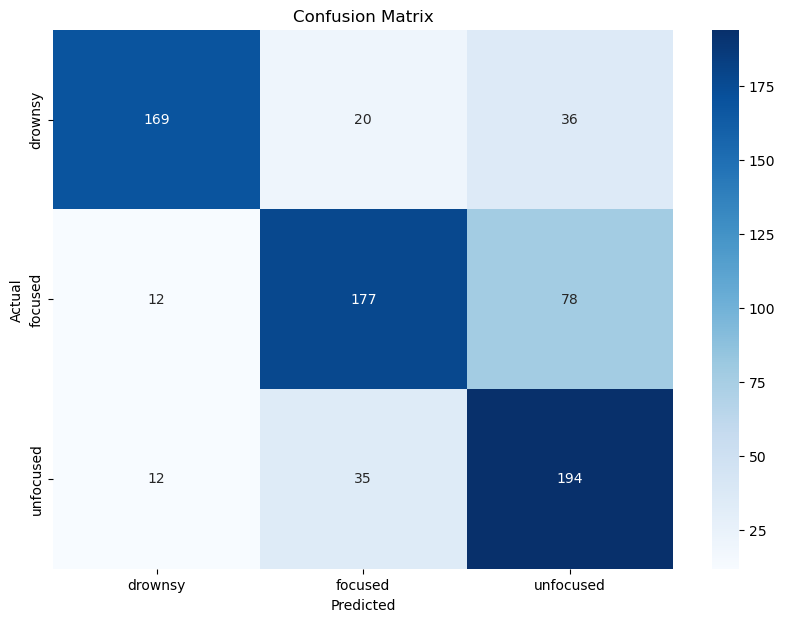

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Epoch method (nếu cần thì sài)

In [22]:
import numpy as np

def feature_extraction_optimized(df, fs, epoch_length):
    bands = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
        'gamma': (30, 50)  # Max is 50 Hz due to preprocessing
    }

    len_data = len(df)
    feature_matrix = []
    labels = []
    num_channels = df.shape[1] - 2  # Exclude time and state columns

    # Convert data to numpy array for performance improvement
    eeg_data = df.iloc[:, 1:num_channels+1].values  # EEG data
    states = df.iloc[:, -1].values  # State labels

    # Precompute frequencies for FFT
    freqs = np.fft.fftfreq(epoch_length, d=1/fs)
    positive_freqs = freqs[freqs >= 0]

    # Precompute masks for frequency bands
    freqs_in_band = {}
    for band_name, (low, high) in bands.items():
        freqs_in_band[band_name] = (positive_freqs >= low) & (positive_freqs < high)

    for i in range(0, len_data - epoch_length + 1, epoch_length):
        epoch_data = eeg_data[i:i+epoch_length, :]
        label = states[i]  # Get label at the start of the epoch

        # Check if epoch is not of sufficient length
        if epoch_data.shape[0] != epoch_length:
            continue

        # Apply FFT to epoch
        fft_data = np.fft.fft(epoch_data, axis=0)
        positive_fft_data = np.abs(fft_data[freqs >= 0, :])

        # Calculate total power for each frequency band
        band_powers = {}
        for band_name in bands.keys():
            band_mask = freqs_in_band[band_name]
            band_power = np.sum(positive_fft_data[band_mask, :], axis=0)  # Result is an array of size (num_channels,)
            band_powers[band_name] = band_power

        # Calculate total power across all frequency bands
        total_power = np.sum(list(band_powers.values()), axis=0)  # Array (num_channels,)

        # Calculate relative power for each frequency band
        relative_powers = {}
        for band_name in bands.keys():
            relative_powers[band_name] = band_powers[band_name] / total_power

        # Find peak frequency for each channel
        freq_indices = np.argmax(positive_fft_data, axis=0)
        peak_freqs = positive_freqs[freq_indices]

        # Calculate descriptive statistics for each channel
        mean_vals = np.mean(positive_fft_data, axis=0)
        std_vals = np.std(positive_fft_data, axis=0)
        median_vals = np.median(positive_fft_data, axis=0)
        min_vals = np.min(positive_fft_data, axis=0)
        max_vals = np.max(positive_fft_data, axis=0)

        # Combine features for the epoch
        epoch_features = []
        for ch in range(num_channels):
            channel_features = [
                band_powers['delta'][ch], band_powers['theta'][ch], band_powers['alpha'][ch],
                band_powers['beta'][ch], band_powers['gamma'][ch],
                relative_powers['delta'][ch], relative_powers['theta'][ch], relative_powers['alpha'][ch],
                relative_powers['beta'][ch], relative_powers['gamma'][ch],
                peak_freqs[ch], mean_vals[ch], std_vals[ch], median_vals[ch], min_vals[ch], max_vals[ch]
            ]
            epoch_features.extend(channel_features)

        feature_matrix.append(epoch_features)
        labels.append(label)

    # Convert to numpy array
    X = np.array(feature_matrix)
    y = np.array(labels)

    return X, y